# Fraud Detection from Credit Card History, Machine learning algorithms
The following jupyter notebook contains a binary classification for fraud detection, from a credit card history. For this; we are gonna explore the following three machine learning algorithms:
* Logistic Regression
* Decition Tree
* Linear Support Vector Machine

This jupyter notebook would showcase the following:
1. Confusion matrix for each of the models
2. Cross validation metrics (precision, recall, f1_score, accuracy_score).
3. Plot of probability distributions between real test data vs each models predictions.

In [33]:
import sys
import os
import pandas as pd
import copy
import matplotlib.pyplot as plt

# Get the root project path
root_project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

#Append it to sys
sys.path.append(root_project_path)

#Import the necessary modules
from utils import DataLoader, CreditCardPreprocesser

### Load the data

In [2]:
#Set the folder name and data folder
folder_name = "data"
data_holder_path = os.path.join(os.getcwd(), os.pardir)

#Set the folder name
data_loader = DataLoader(data_folder_name=folder_name,\
    data_folder_path=data_holder_path)

#Get the data
df_data = data_loader.get_dataset()

### Get the preprocessed dataframe

In [3]:
#Create an instance of the Credit card processer
credit_card_processer = CreditCardPreprocesser(df_data=df_data)

#Obtain the df_preprocessed
df_preprocessed = credit_card_processer.fetch_preprocessed_dataframe()

In [4]:
df_preprocessed.shape

(1296675, 96)

In [5]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 96 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   gender                   1296675 non-null  int64  
 3   zip                      1296675 non-null  int64  
 4   lat                      1296675 non-null  float64
 5   long                     1296675 non-null  float64
 6   city_pop                 1296675 non-null  int64  
 7   unix_time                1296675 non-null  int64  
 8   merch_lat                1296675 non-null  float64
 9   merch_long               1296675 non-null  float64
 10  is_fraud                 1296675 non-null  int64  
 11  merch_zipcode            1296675 non-null  float64
 12  transaction_year         1296675 non-null  int32  
 13  transaction_month        1296675 non-null 

### Lets select the X and Y target

In [6]:
X: pd.DataFrame = df_preprocessed[[col for col in df_preprocessed.columns if col != "is_fraud"]]
y: pd.DataFrame = df_preprocessed["is_fraud"]

In [7]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Lets now oversample it using SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

#Obtain the over sampled new values
X_smote, y_smote = smote.fit_resample(X.astype("float"), y)

In [9]:
y_smote.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

### Select the continous columns:

Lets select now the continous columns; where we are gonna apply our `Standardscaler()` instance from scikit-learn to perform standardscaling on ONLY the continous features.

In [10]:
#List all the continous features
continous_features = ["cc_num", "amt", "zip", "lat", "long", "city_pop", "unix_time",\
    "merch_lat", "merch_long", "merch_zipcode", "transaction_year", "transaction_month",\
    "transaction_day", "transaction_hour", "transaction_minute", "transaction_second",\
    "birth_year", "birth_month", "birth_day", "merchant_encoded", "merchant_freq",\
    "first_encoded", "first_freq", "last_encoded", "last_freq", "street_encoded",\
    "street_freq", "city_encoded", "city_freq", "job_encoded", "job_freq"]

#Select the continous and not continous 
X_smote_continous = X_smote[continous_features]
X_smote_discontinous = X_smote[[c for c in X_smote.columns if c not in continous_features]]

In [11]:
X_smote_discontinous.head(3)

,gender,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lets implement the standardscaler to continous features

In [12]:
# Importing standard scaler
from sklearn.preprocessing import StandardScaler

#Create a standard scaler object and fit x_train
standard_scaler = StandardScaler()
standard_scaler.fit(X_smote_continous)

#Transform x_train and x_test
X_continous_scaled = standard_scaler.transform(X_smote_continous)

In [13]:
# Now lets make a pandas dataframe
X_continous_scaled = pd.DataFrame(X_continous_scaled,\
    columns=X_smote_continous.columns)

In [14]:
X_continous_scaled.shape

(2578338, 31)

In [15]:
X_continous_scaled.head(3)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,merch_zipcode,...,first_encoded,first_freq,last_encoded,last_freq,street_encoded,street_freq,city_encoded,city_freq,job_encoded,job_freq
0,-0.314132,-0.849753,-0.730168,-0.492973,0.634532,-0.285514,-1.758054,-0.502056,0.571818,-0.748066,...,-0.081651,1.395499,-0.301641,-0.634750,-0.348144,0.579120,-0.335409,0.202176,-0.255926,-0.059168
1,-0.316222,-0.553321,1.875073,2.008024,-2.007172,-0.296182,-1.758052,2.048225,-2.003283,-0.014340,...,-0.200974,0.425223,-0.227091,-0.472358,-0.348144,1.796911,-0.335409,1.621156,-0.243560,0.686195
2,-0.316192,-0.226103,1.287263,0.698462,-1.582836,-0.283414,-1.758052,0.882782,-1.573461,1.584246,...,-0.274166,-0.748035,-0.053551,0.176727,-0.348144,-1.274305,-0.335409,-1.224287,0.115585,-1.514400


### Now lets create the actual datasets.

In [16]:
# These are the new datasets
X_data = pd.concat([X_continous_scaled, X_smote_discontinous], axis=1)
y_data = copy.copy(y_smote)

In [17]:
#Lets get the shapes
print(X_data.shape)
print(y_data.shape)

(2578338, 95)
(2578338,)


### Lets initialize the following classifiers
Now we are gonna intialize each of the classifiers, and perform cross validation to obtain all of the different metrics.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [26]:
ml_classifiers = {
    "Logistic Regression": LogisticRegression(random_state = 42, max_iter=1000),
    "Decition Tree Classifier": DecisionTreeClassifier(random_state = 42),
    "Linear Support Vector Machine": LinearSVC(C=1.0, max_iter=1000)
}

### Lets split the data here
We would like to perform the following:
1. Split our data into train_validation and test; we would hold the test dataset for a final analysis.
2. Perform cross validation using train_validation; and perform shuffled folds to see its accuracies.
3. Keep the saved cross val scores; for later analysis.

In [20]:
#Lets obtain the data into train_val and test
x_train_val, x_test, y_train_val, y_test = train_test_split(X_data, y_data,\
    test_size=0.2, shuffle=True, random_state=42)
print(x_train_val.shape)
print(x_test.shape)
print(y_train_val.shape)
print(y_test.shape)

(2062670, 95)
(515668, 95)
(2062670,)
(515668,)


### Perform Cross validation for all ML algorithms
Lets now perform cross validation for each of the ML algorithms, to obtain its results.

In [21]:
#Lets create the holders for each metrics
ml_metrics = {}

for name, clf in ml_classifiers.items():
    print(f"\n==========={name}============ Starting")
    #Lets initialize variables for each
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lets write a fot loop that goes 20 times
    for i in range(20):
        print(f"iteration: {i}: {name}")
        #Call the train test split
        x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, shuffle=True)

        #Lets fit each of the classifiers
        clf.fit(X=x_train, y=y_train)

        #Obtain the predictions for both
        y_pred = clf.predict(x_val)

        #Lets append them
        accuracies.append(accuracy_score(y_val, y_pred))
        precisions.append(precision_score(y_val, y_pred))
        recalls.append(recall_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred))

    #Lets add the metrics
    ml_metrics[name + "_accuracies"] = accuracies
    ml_metrics[name + "_precisions"] = precisions
    ml_metrics[name + "_recalls"] = recalls
    ml_metrics[name + "_f1_scores"] = f1_scores

    #Create a dataframe and save it into a dataframe
    df_results = pd.DataFrame(ml_metrics)
    df_results.to_csv('my_data_' + name + '.csv', index=False)
    print(f"\n==========={name}============ Ending")


===========Linear Support Vector Machine============ Starting
iteration: 0: Linear Support Vector Machine
iteration: 1: Linear Support Vector Machine
iteration: 2: Linear Support Vector Machine
iteration: 3: Linear Support Vector Machine
iteration: 4: Linear Support Vector Machine
iteration: 5: Linear Support Vector Machine
iteration: 6: Linear Support Vector Machine
iteration: 7: Linear Support Vector Machine
iteration: 8: Linear Support Vector Machine
iteration: 9: Linear Support Vector Machine
iteration: 10: Linear Support Vector Machine
iteration: 11: Linear Support Vector Machine
iteration: 12: Linear Support Vector Machine
iteration: 13: Linear Support Vector Machine
iteration: 14: Linear Support Vector Machine
iteration: 15: Linear Support Vector Machine
iteration: 16: Linear Support Vector Machine
iteration: 17: Linear Support Vector Machine
iteration: 18: Linear Support Vector Machine
iteration: 19: Linear Support Vector Machine

===========Linear Support Vector Machine======

# Data Visualization

Now that we have finally got the cross validation metrics, we are gonna perform the last steps in order to see the different results of each of the ML models. This would be illustrated as:

1. Plot bar plot of accuracies, precision, recall, and f1 score for cross validation metrics of each of the models.

Next; after having the cross validation metrics; we previously have isolated a part of the data as test set. We are gonna train a final model for each ML classifier, and obtain the test metrics as well. With these test and cross validation metrics; we are gonna perform the following:

2. Plot bar plot of accuracies, precision, recall, and f1 score for test metrics of each of the models.
3. Generate confusion matrices for each of the test final models.
2. Create ROC curves for all models and overlau for comparison

In [53]:
from typing import List
def read_df_data(clfs_names:List[str]) -> pd.DataFrame:
    '''
    Function that would retrieve the checkpoints cross validation
    values for accuracy, precision, recall, and f1 score.
    '''
    #Create a holder to store the data
    actual_data = {}

    for name in clfs_names:
        #Read the dataframe
        df_data = pd.read_csv("my_data_" + name + ".csv")

        #Assign it to the actual data properly
        actual_data[name + "_accuracies"] = df_data[name + "_accuracies"].to_numpy()
        actual_data[name + "_precisions"] = df_data[name + "_precisions"].to_numpy()
        actual_data[name + "_recalls"] = df_data[name + "_recalls"].to_numpy()
        actual_data[name + "_f1_scores"] = df_data[name + "_f1_scores"].to_numpy()
    
    #Return the total dataframe.
    return pd.DataFrame(actual_data)

In [54]:
#Lets get the cross validation metrics
df_cross_val_metrics = read_df_data(clfs_names=ml_classifiers.keys())

print(ml_classifiers.keys())


dict_keys(['Logistic Regression', 'Decition Tree Classifier', 'Linear Support Vector Machine'])


In [55]:
df_cross_val_metrics.columns

Index(['Logistic Regression_accuracies', 'Logistic Regression_precisions',
       'Logistic Regression_recalls', 'Logistic Regression_f1_scores',
       'Decition Tree Classifier_accuracies',
       'Decition Tree Classifier_precisions',
       'Decition Tree Classifier_recalls',
       'Decition Tree Classifier_f1_scores',
       'Linear Support Vector Machine_accuracies',
       'Linear Support Vector Machine_precisions',
       'Linear Support Vector Machine_recalls',
       'Linear Support Vector Machine_f1_scores'],
      dtype='object')

In [56]:
df_cross_val_metrics.head(2)

,Logistic Regression_accuracies,Logistic Regression_precisions,Logistic Regression_recalls,Logistic Regression_f1_scores,Decition Tree Classifier_accuracies,Decition Tree Classifier_precisions,Decition Tree Classifier_recalls,Decition Tree Classifier_f1_scores,Linear Support Vector Machine_accuracies,Linear Support Vector Machine_precisions,Linear Support Vector Machine_recalls,Linear Support Vector Machine_f1_scores
0,0.899715,0.928023,0.866518,0.896217,0.998449,0.997649,0.999251,0.998449,0.885267,0.921700,0.842319,0.880223
1,0.899538,0.927577,0.866385,0.895937,0.998449,0.997624,0.999284,0.998453,0.884928,0.919574,0.843096,0.879676


### Lets plot the cross validation bar plots

In [57]:
# Lets create two lists for a new dataframe, models and metrics
models = ml_classifiers.keys()
metrics = ["accuracies", "precisions", "recalls", "f1_scores"]

#Lets do a df plot cross val
plot_cross_val = []
for model in models:
    model_data = [df_cross_val_metrics[f"{model}_{metric}"].mean() for metric in metrics]
    plot_cross_val.append(model_data)

# Convert to a Pandas DataFrame for plotting
df_plot_cross_val = pd.DataFrame(plot_cross_val, columns=metrics, index=models)

In [58]:
df_plot_cross_val.head(3)

,accuracies,precisions,recalls,f1_scores
Logistic Regression,0.899759,0.928160,0.866322,0.896175
Decition Tree Classifier,0.998417,0.997636,0.999200,0.998418
Linear Support Vector Machine,0.885487,0.921531,0.842549,0.880272


### Plot the bar graph of cross val metrics

(0.83, 1.01)

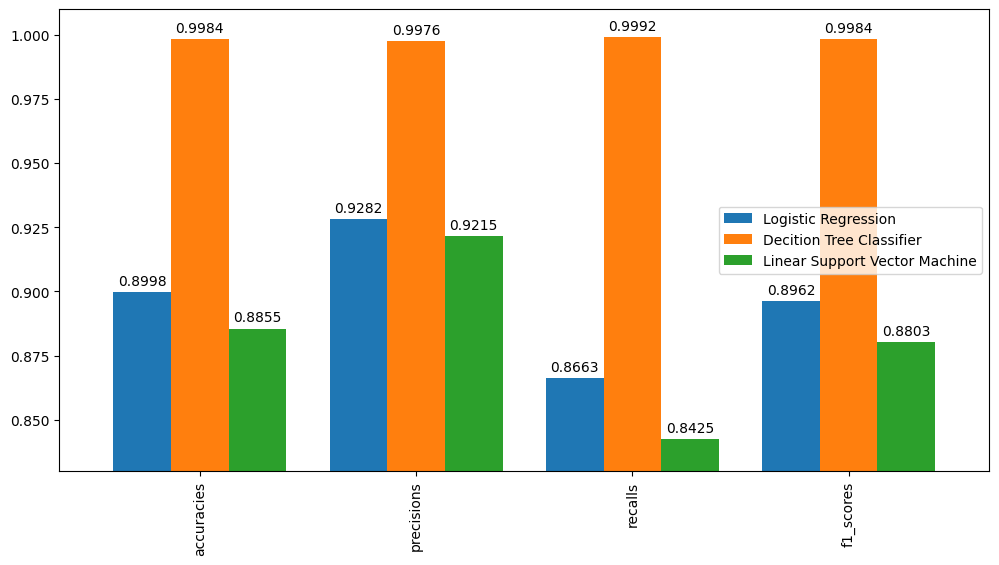

In [61]:
fig, axs = plt.subplots(1, figsize = (12, 6))
df_plot_cross_val.T.plot(ax=axs, kind="bar", legend=True, width = 0.8)

# Rotate x-axis ticks
axs.set_xticklabels(axs.get_xticklabels(), rotation=90, fontsize=10)

# Annotate bar values
for container in axs.containers:
    axs.bar_label(container, fmt='%.4f', fontsize=10, padding=3)  # Adjust padding for better visibility

axs.set_ylim(0.83, 1.01)